In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
# Load sense relations data and save to numpy array
file_location = 'D:\Study and Projects\School Work\Year 25 - PhD 1\Data\Analysis Results\Word Similarities\sense_relations_analysis.txt'

table = pd.read_table(file_location, index_col=0, header=0, sep="\t", skip_blank_lines=True)
table['dataset_sim'] = table['dataset_sim'].values+np.random.uniform(-0.006, 0.006, len(table.index)) # add jitter to experimental values

In [29]:
# Polynomial regression
def poly_reg(data):
    xs = data[:,0]
    ys = data[:,1]
    xs_sq = PolynomialFeatures(degree=2).fit_transform(xs.reshape(-1, 1))
    regression = LinearRegression()
    regression.fit(xs_sq, ys)
    return(regression)

# Linear regression
def lin_reg(data):
    xs = data[:,0]
    ys = data[:,1]
    regression = LinearRegression()
    regression.fit(xs.reshape(-1, 1), ys)
    return(regression)

# Compute signed error of two series
def mean_signed_error(y_true, y_pred):
    diffs = y_true-y_pred
    me = np.mean(diffs)
    return(me)

# Function to add subplot to main plot with regression lines
def gen_sub_plot(data, fig, plot_num, subheading, full_reg=True):
    
    # generate figure
    xs = data[:,0]
    ys = data[:,1]
    fig_axis = fig.add_subplot(*plot_num) # create figure subplot
    fig_axis.scatter(xs, ys, s=2) # 's' gives dot size
    fig_axis.set_xlim(0,1)
    fig_axis.set_ylim(-0.1,1)
    
    # calculate values needed for regressions and plotting
    x_range = np.arange(0, 1, step=0.01)
    x_range_sq = PolynomialFeatures(degree=2).fit_transform(x_range.reshape(-1, 1))
    xs_sq = PolynomialFeatures(degree=2).fit_transform(xs.reshape(-1, 1))
    
    if full_reg==True:
        # add all data polynomial reg line    
        poly_regression = poly_reg(full_data_np) # poly regression for full dataset
        fig_axis.plot(x_range, poly_regression.predict(x_range_sq), color='red', linewidth=2)
        r_square_all = r2_score(ys, poly_regression.predict(xs_sq))
    else:
        # add partial data polynomial reg line
        poly_regression = poly_reg(data) # poly regression for full dataset
        fig_axis.plot(x_range, poly_regression.predict(x_range_sq), color='red', linewidth=2)
        r_square_all = r2_score(ys, poly_regression.predict(xs_sq))
    
    # add linear reg line
    lin_regression = lin_reg(data) # linear regression for sense relation only
    fig_axis.plot(x_range, lin_regression.predict(x_range.reshape(-1, 1)), color='blue', linewidth=1) 
    r_square = r2_score(ys, lin_regression.predict(xs.reshape(-1, 1)))
    xs_sq = PolynomialFeatures(degree=2).fit_transform(xs.reshape(-1, 1))
    me = mean_signed_error(ys, poly_regression.predict(xs_sq))
    
    # add labels
    fig_axis.title.set_text(subheading) # subfigure figure title
    # fig_axis.set(ylabel='ConceptNet', xlabel='MEN')
    fig_axis.text(0.05, 0.85, 'R-sq-rel: {:.3f}'.format(r_square, r_square_all))
    fig_axis.text(0.05, 0.75, 'ME: {:.3f}'.format(me))


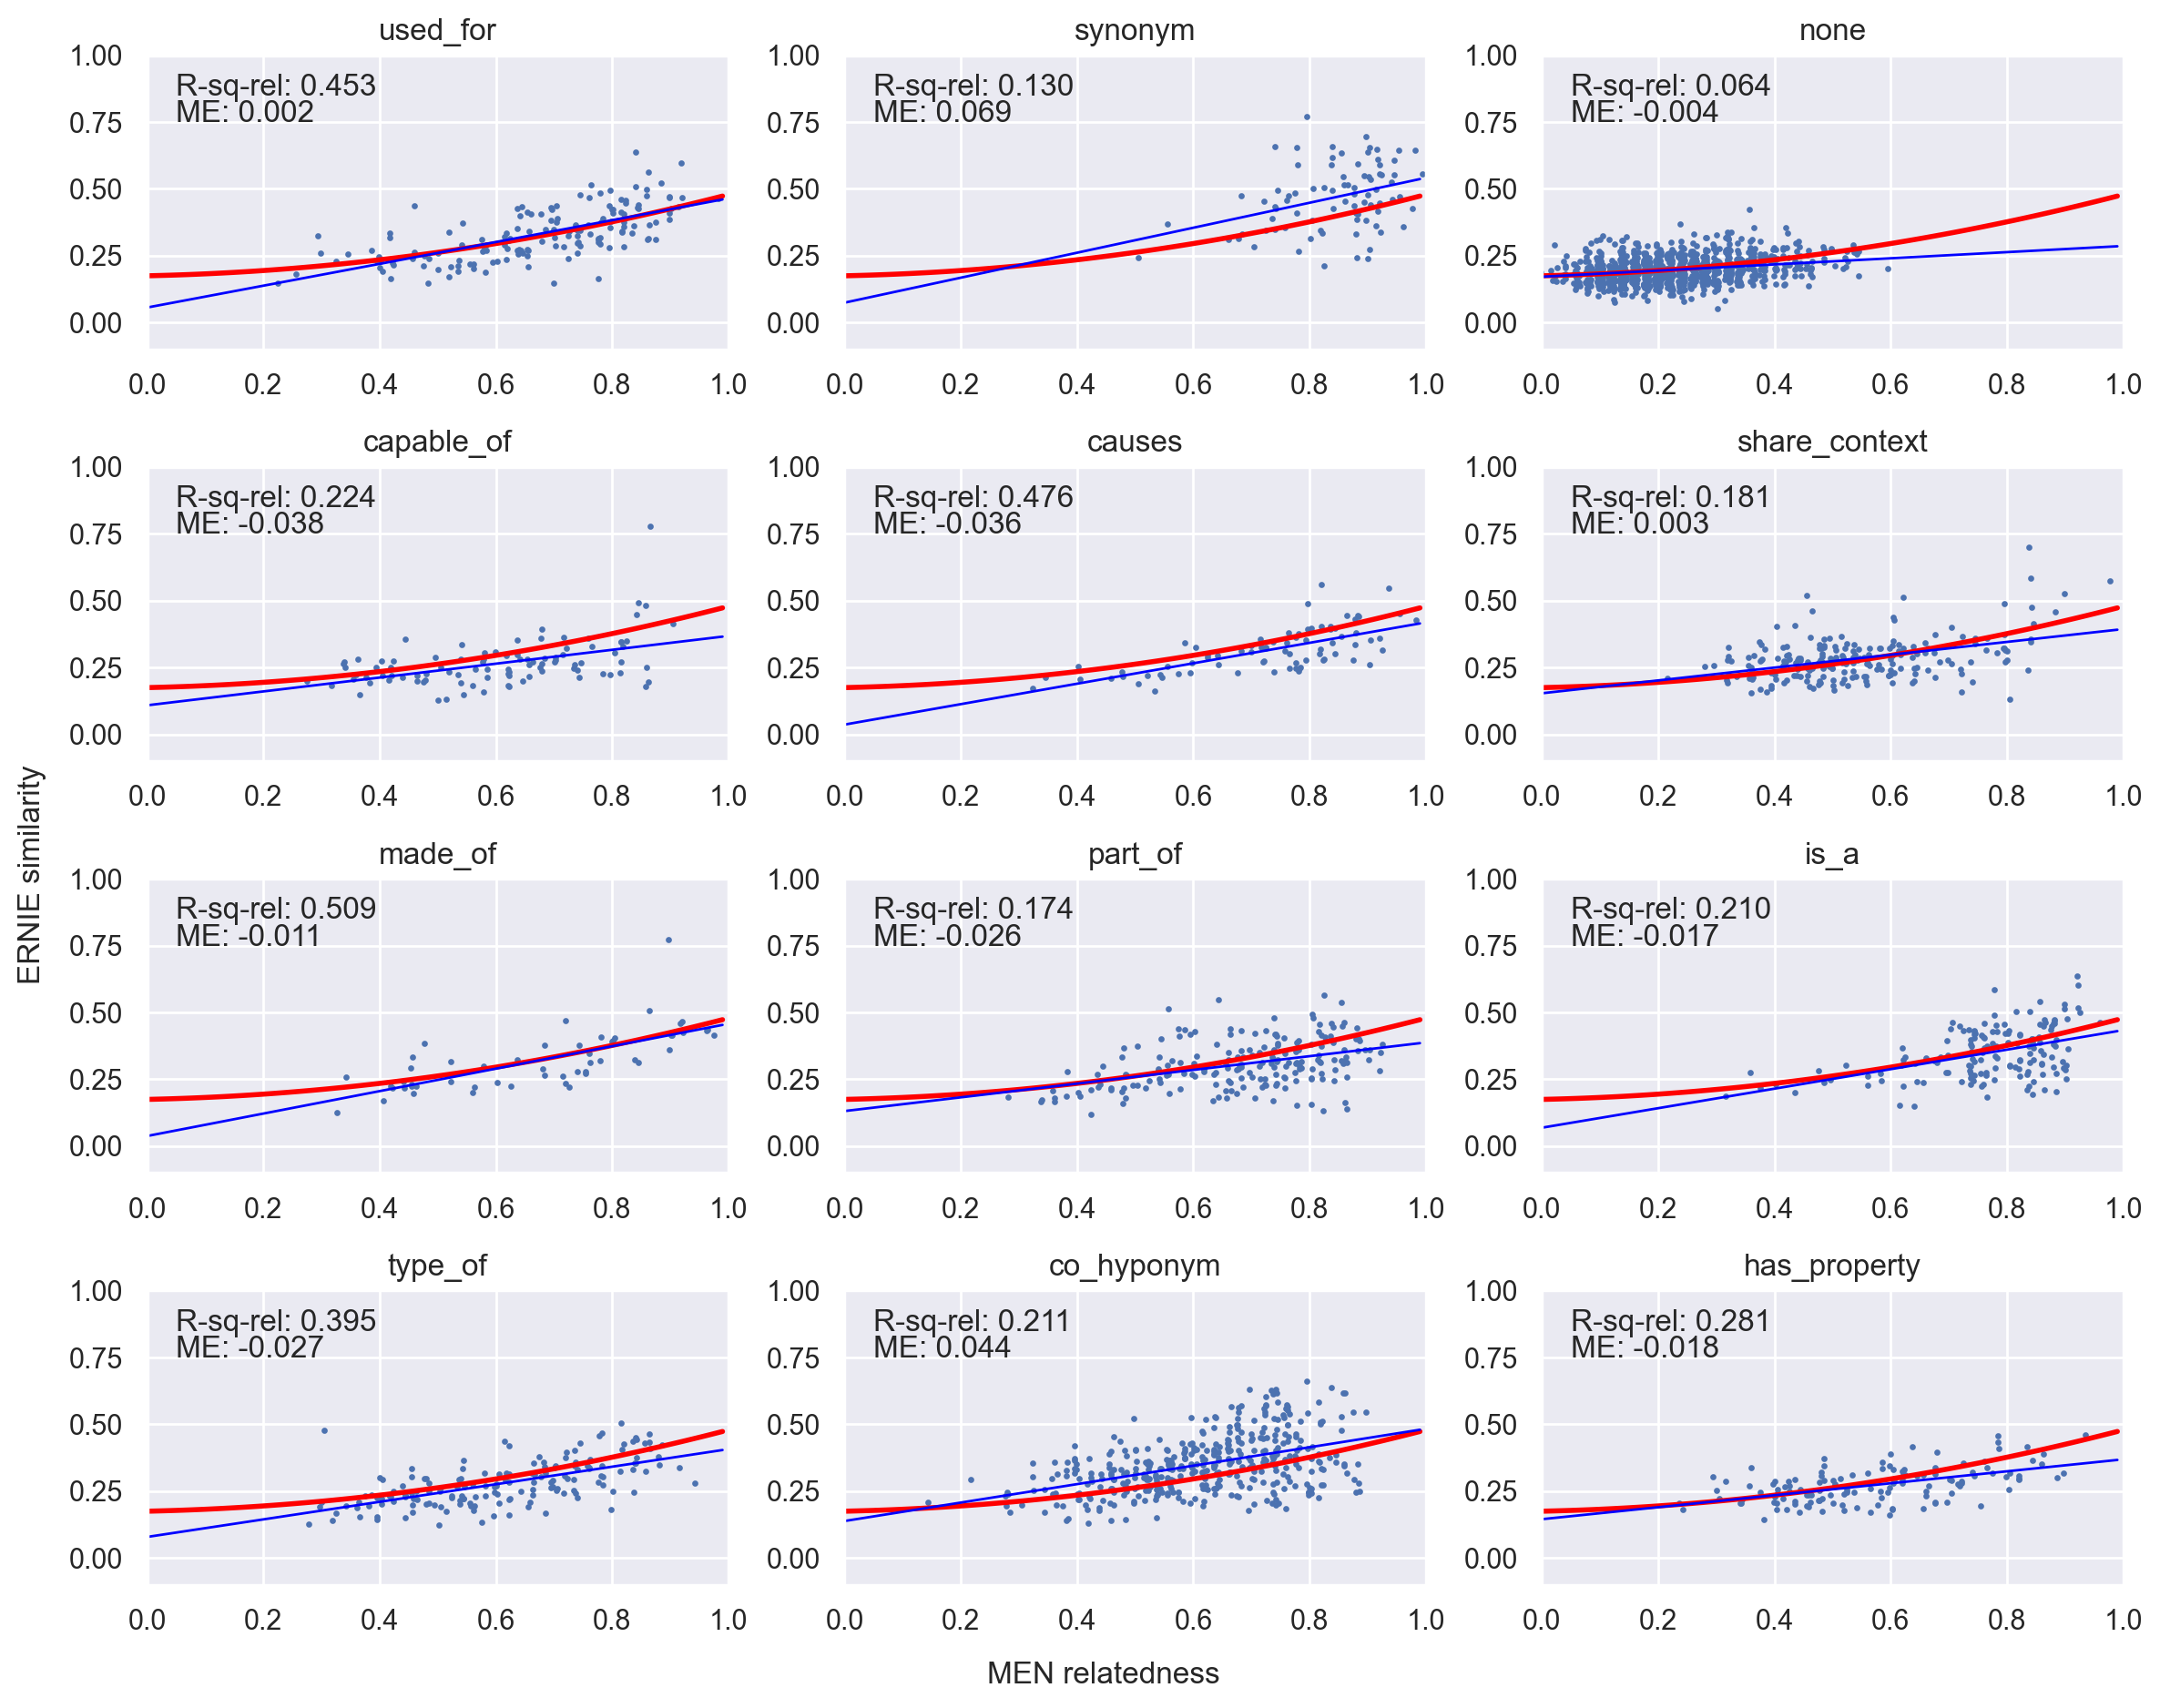

In [33]:
## Plot results

# Get data to use
model_to_test = 'ernie_sim'
full_data_np = table.loc[table['sense_relation']!='blob', ['dataset_sim',model_to_test]].to_numpy() 
sense_relations_list = list(set(list(table['sense_relation'].values))) # get full list of sense relations
[sense_relations_list.remove(item) for item in ['located_near', 'occurs_at', 'entails', 'antonym']] # remove these sense relations

# Define properties of main plot
width = 14
height = 10
sns.set()
fig = plt.figure(figsize=(width,height), facecolor='white', dpi=200)
fig.subplots_adjust(wspace=0.2, hspace=0.4) # space between subplots
# plt.suptitle(model_to_test)
subplots = tuple(sense_relations_list)

# Generate series of subplots using add_subplot function
i=1
for sense_relation in sense_relations_list: # loop over sense relations
    plot_num = i
    data_pd = table.loc[table['sense_relation'] == sense_relation, ['dataset_sim',model_to_test]]
    data_table_np = data_pd.to_numpy() # convert to numpy
    plot_num = [4,3,i]
    gen_sub_plot(data_table_np, fig, plot_num, sense_relation, True) # add subplot
    i=i+1
    
fig.subplots_adjust(top=0.95) # remove excess white space under title
fig.text(0.5, 0.06, 'MEN relatedness', ha='center', va='center')
fig.text(0.08, 0.5, 'ERNIE similarity', ha='center', va='center', rotation='vertical')
# fig.supylabel('ConceptNet similarity')
plt.show()

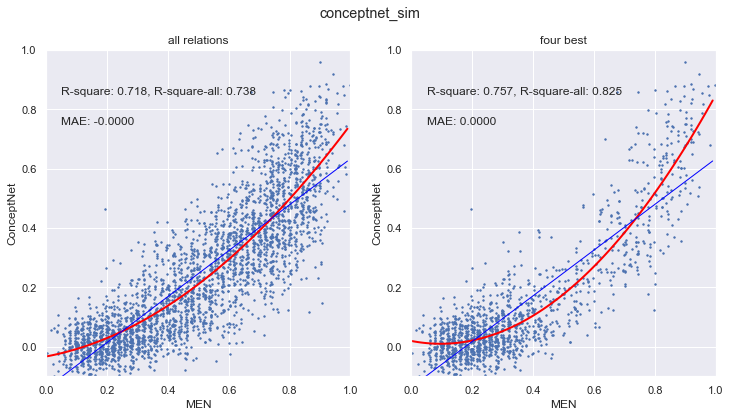

In [15]:
## Additional plots
width = 12
height = 6
fig = plt.figure(figsize=(width,height), facecolor='white')
fig.subplots_adjust(wspace=0.2, hspace=0.4) # space between subplots
plt.suptitle(model_to_test)
subplots = tuple(sense_relations_list)

data_pd = table.loc[(table['sense_relation']!='blob'), ['dataset_sim',model_to_test]]
data_table_np = data_pd.to_numpy() # convert to numpy
plot_num = [1,2,1]
gen_sub_plot(data_table_np, fig, plot_num, 'all relations', False)

data_pd = table.loc[(table['sense_relation'].isin(['synonym','none','used_for','type_of'])), ['dataset_sim',model_to_test]]
data_table_np = data_pd.to_numpy() # convert to numpy
plot_num = [1,2,2]
gen_sub_plot(data_table_np, fig, plot_num, 'four best', False)

sns.set()
plt.show()